Modules

In [2]:
import sys
sys.path.append("/Users/lucasbouguet/Coding/tests/intra_rg/srcs")
from linear_regression import linear_regression as ln
from params import params
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import importlib

Dataset

In [3]:
df = ln.retrieve_dataset("/Users/lucasbouguet/Coding/tests/intra_rg/data/data.csv")

In [4]:
# Isolating targets and feature into lists
feature = df[:, 0] # km 
target = df[:, 1] # price
print(feature.shape)

(24,)


In [15]:
lr = 0.05
a = 0
b = 0
nx = np.zeros(feature.shape[0]).reshape(-1, 1)
i = 0
while i < len(feature):
	nx[i] = ((feature[i] - np.min(feature)) / (np.max(feature) - np.min(feature)))
	i += 1
for el in range(0, 300):
	# gradient de a et b
	gradient_a = 0
	gradient_b = 0
	print(f"a vaut {a}")
	for x, y in zip(nx, target):
		gradient_a += ((a * x + b) - y ) * x
		gradient_b += ((a * x + b) - y)
	print(f"gradient de a est: {gradient_a}")
	print(f"gradient de b est: {gradient_b}")
	gradient_a /= len(feature)
	gradient_b /= len(feature)
	# descente de gradient
	a -= gradient_a * lr
	b -= gradient_b * lr
	# fonction cout
	cout_moyen = 0
	for x, y in zip(nx, target):
		cout_moyen += (a * x + b) - y
	if cout_moyen < 0:
		cout_moyen *= -1
	cout_moyen /= len(feature)
	print(f"	le cout moyen est: {int(cout_moyen):,}")

a vaut 0
gradient de a est: [-48409.89665639]
gradient de b est: [-151964.]
	le cout moyen est: 5,978
a vaut [100.85395137]
gradient de a est: [-45223.82932361]
gradient de b est: [-143494.30044578]
	le cout moyen est: 5,646
a vaut [195.07026246]
gradient de a est: [-42219.87629135]
gradient de b est: [-135505.44307207]
	le cout moyen est: 5,332
a vaut [283.02833807]
gradient de a est: [-39387.68707184]
gradient de b est: [-127970.1072557]
	le cout moyen est: 5,035
a vaut [365.08601947]
gradient de a est: [-36717.49930269]
gradient de b est: [-120862.52473936]
	le cout moyen est: 4,756
a vaut [441.58080968]
gradient de a est: [-34200.10532937]
gradient de b est: [-114158.39142565]
	le cout moyen est: 4,493
a vaut [512.83102912]
gradient de a est: [-31826.82068651]
gradient de b est: [-107834.78418289]
	le cout moyen est: 4,244
a vaut [579.13690555]
gradient de a est: [-29589.45437001]
gradient de b est: [-101870.08237815]
	le cout moyen est: 4,010
a vaut [640.78160215]
gradient de a es

/var/folders/wd/27x45ccd7bzfnqkst4sc6dtw0000gn/T/ipykernel_52624/1730086482.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(f"	le cout moyen est: {int(cout_moyen):,}")


	le cout moyen est: 104
a vaut [431.77948967]
gradient de a est: [5985.38706302]
gradient de b est: [-2510.7178766]
	le cout moyen est: 103
a vaut [419.30993329]
gradient de a est: [5974.9070782]
gradient de b est: [-2492.93396155]
	le cout moyen est: 103
a vaut [406.86221021]
gradient de a est: [5964.20442861]
gradient de b est: [-2475.85057624]
	le cout moyen est: 102
a vaut [394.43678432]
gradient de a est: [5953.29379689]
gradient de b est: [-2459.42868566]
	le cout moyen est: 101
a vaut [382.03408891]
gradient de a est: [5942.18902636]
gradient de b est: [-2443.63147088]
	le cout moyen est: 101
a vaut [369.65452844]
gradient de a est: [5930.90316874]
gradient de b est: [-2428.42420311]
	le cout moyen est: 100
a vaut [357.29848017]
gradient de a est: [5919.4485291]
gradient de b est: [-2413.77412499]
	le cout moyen est: 99
a vaut [344.96629573]
gradient de a est: [5907.83670838]
gradient de b est: [-2399.65033853]
	le cout moyen est: 99
a vaut [332.65830259]
gradient de a est: [589

In [4]:
# Normalizing shapes
x = feature.reshape(feature.shape[0], 1)
y = target.reshape(target.shape[0], 1)
nx = np.zeros(len(x), dtype=float).reshape(-1, 1)

In [5]:
# Normalizing values between 0 and 1 (prevents float underflow)
xmin = np.min(x)
xmax = np.max(x)
for i in range(len(x)):
	nx[i] = (x[i] - xmin) / (xmax - xmin)

In [6]:
# Adding bias column to X
X = np.hstack((nx, np.ones(nx.shape)))

In [7]:
# Creating theta vector from random values
theta = np.random.randn(2, 1)

In [8]:
# Defining theta
res = ln.gradient_descent(X, y, theta, lr=params.lr, turns=params.turns)
predictions = ln.model(X, res["theta"])

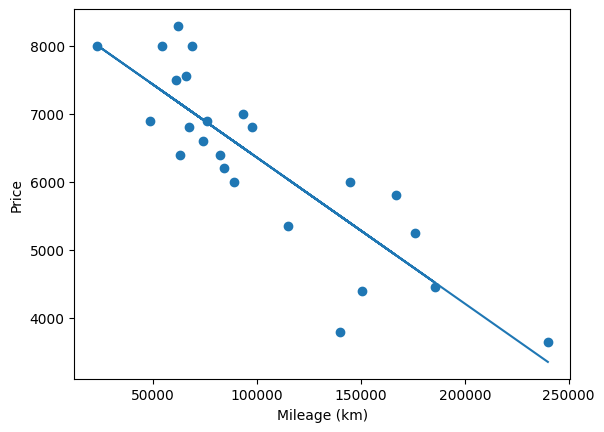

In [9]:
# Plotting linear regression
plt.scatter(feature, y)
plt.xlabel("Mileage (km)")
plt.ylabel("Price")
plt.plot(feature, predictions)
plt.savefig(fname=params.stats_path + "linear_regression")

[5057034.340719812, 2057439.1476327414, 1452415.0288725197, 1296096.8819217377, 1225572.2934495655, 1173072.423927146, 1125862.4566720042, 1081473.42837504, 1039355.0594980642, 999319.2148087291, 961249.4736922067, 925046.7745530447, 890619.0848116884, 857879.2889655769, 826744.6180066066, 797136.374889906, 768979.723444454, 742203.496951818, 716740.0178471627, 692524.9265836616, 669497.0189475102, 647598.091360089, 626772.7937665377, 606968.4897370938, 588135.1234272592, 570225.0930604725, 553193.1306134978, 536996.1874004303, 521593.3252661302, 506945.6131140711, 493016.0285070783, 479769.36409224704, 467172.13861353014, 455192.51228707423, 443800.2063254181, 432966.42640714394, 422663.78989855293, 412866.2566434133, 403549.0631458533, 394688.659980043, 386262.6522684651, 378249.7430783361, 370629.679593107, 363383.201922993, 356491.9944251484, 349938.63941044913, 343706.5731198727, 337780.04385920794, 332144.07218627736, 326784.4130500437, 321687.51978590945, 316840.50987620227, 312

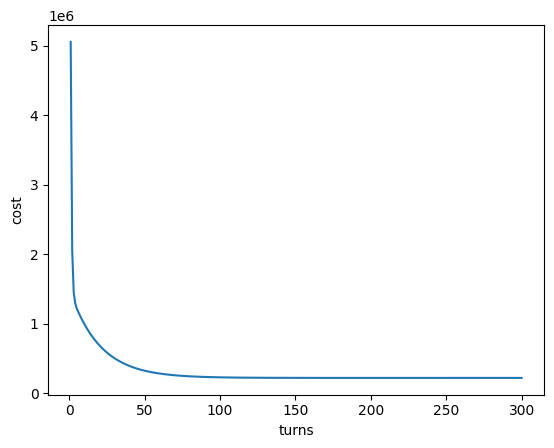

In [29]:
# Plotting cost function results
print(res["costs"])
plt.plot(range(1, len(res["costs"]) + 1) ,res["costs"])
plt.xlabel("turns")
plt.ylabel("cost")
plt.savefig(fname=params.stats_path + "cost_function_res")
plt.show()

In [ ]:
# Write down the new theta in params.py
with open("/home/lu/Coding/ft_linear_regression_git/srcs/params/params.py", "r") as f:
    content = f.read()
    if str(res['theta'][1]) not in content and str(res['theta'][0]) not in content:
        with open("/home/lu/Coding/ft_linear_regression_git/srcs/params/params.py", "a") as f:
            f.write(f"theta0 = {res['theta'][1]}\n")
            f.write(f"theta1 = {res['theta'][0]}\n")
